In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [57]:
#df for everything else, df_old for gunsmith
df = pd.read_csv('PHDRC.csv')
df_old = pd.read_csv('PHDRC2.csv')

In [58]:
df.head()

,Glimmer,PHE,GE,CI,Mod,Type,OL,AO
0,660,NaN,1.0,NaN,NaN,WC,3,LANDING
1,726,NaN,NaN,NaN,NaN,WC,3,LANDING
2,495,1.0,NaN,NaN,NaN,HVT,3,LANDING
3,660,NaN,NaN,NaN,NaN,WC,3,LANDING
4,726,NaN,NaN,NaN,NaN,WC,4,LANDING


### Glimmer exploration

In [59]:
df['Glimmer'].describe()

count    1000.000000
mean      574.781000
std       187.282326
min         0.000000
25%       495.000000
50%       660.000000
75%       693.000000
max       825.000000
Name: Glimmer, dtype: float64

In [60]:
df['Glimmer'].median()

np.float64(660.0)

In [61]:
df['Glimmer'].mode()

0    693
Name: Glimmer, dtype: int64

In [62]:
#rounding because you can't get a fraction of a glimmer.
round(df['Glimmer'].mean())

575

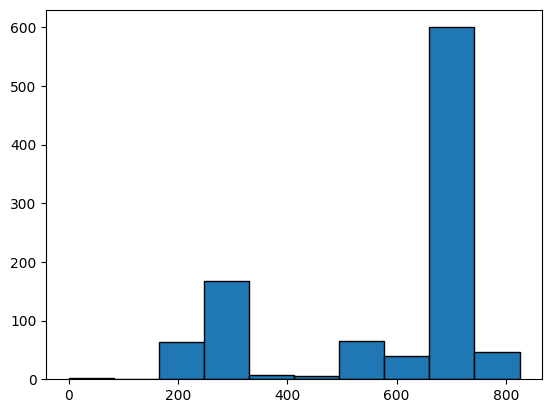

In [63]:
plt.hist(df['Glimmer'], edgecolor='black')
#plt.savefig("glimmer distribution.png")

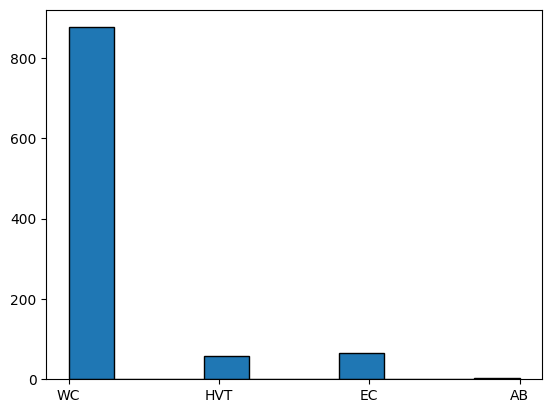

In [64]:
plt.hist(df['Type'], edgecolor='black')
#plt.savefig("chest distribution.png")

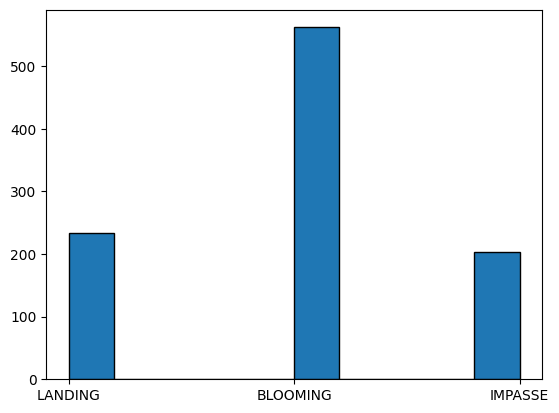

In [65]:
plt.hist(df['AO'], edgecolor='black')
#plt.savefig("area distribution.png")

In [66]:
#Proving glimmer amounts are discrete
pd.unique(df['Glimmer'])

array([660, 726, 495, 693, 759, 825, 627, 528, 264, 231, 297, 330, 497,
       315,   0, 792, 462])

In [67]:
#"drop rates" for glimmer amounts.
df['Glimmer'].value_counts(normalize=True) * 100

Glimmer
693    26.8
660    18.1
726    15.1
264    11.2
231     6.4
495     5.8
297     5.4
627     4.0
759     3.5
330     0.8
825     0.8
528     0.7
462     0.5
792     0.4
0       0.3
497     0.1
315     0.1
Name: proportion, dtype: float64

In [68]:
df.groupby('Glimmer')['Type'].value_counts()

Glimmer  Type
0        AB        2
         EC        1
231      WC       64
264      WC      112
297      WC       54
315      HVT       1
330      HVT       8
462      EC        5
495      HVT      48
         EC       10
497      EC        1
528      EC        7
627      WC       37
         EC        3
660      WC      161
         EC       20
693      WC      260
         EC        8
726      WC      151
759      WC       35
792      EC        2
         WC        2
825      EC        8
Name: count, dtype: int64

In [69]:
df.groupby('Glimmer')['AO'].value_counts()

Glimmer  AO      
0        BLOOMING      2
         LANDING       1
231      BLOOMING     34
         LANDING      18
         IMPASSE      12
264      BLOOMING     73
         LANDING      21
         IMPASSE      18
297      BLOOMING     31
         LANDING      14
         IMPASSE       9
315      BLOOMING      1
330      BLOOMING      5
         LANDING       2
         IMPASSE       1
462      LANDING       3
         BLOOMING      1
         IMPASSE       1
495      BLOOMING     29
         LANDING      15
         IMPASSE      14
497      BLOOMING      1
528      BLOOMING      4
         IMPASSE       2
         LANDING       1
627      BLOOMING     23
         LANDING       9
         IMPASSE       8
660      BLOOMING     99
         LANDING      42
         IMPASSE      40
693      BLOOMING    148
         LANDING      64
         IMPASSE      56
726      BLOOMING     90
         LANDING      32
         IMPASSE      29
759      BLOOMING     17
         LANDING      11
       

In [70]:
df.groupby('AO')['Glimmer'].value_counts(normalize=True)

AO        Glimmer
BLOOMING  693        0.263345
          660        0.176157
          726        0.160142
          264        0.129893
          231        0.060498
          297        0.055160
          495        0.051601
          627        0.040925
          759        0.030249
          330        0.008897
          528        0.007117
          825        0.007117
          0          0.003559
          315        0.001779
          462        0.001779
          497        0.001779
IMPASSE   693        0.274510
          660        0.196078
          726        0.142157
          264        0.088235
          495        0.068627
          231        0.058824
          297        0.044118
          627        0.039216
          759        0.034314
          792        0.019608
          825        0.014706
          528        0.009804
          330        0.004902
          462        0.004902
LANDING   693        0.273504
          660        0.179487
          726        0

In [71]:
blooming_df = df[df['AO'] == 'BLOOMING']
blooming_glimmer = blooming_df.groupby('AO')['Glimmer'].value_counts(normalize=True)
blooming_glimmer.head()

AO        Glimmer
BLOOMING  693        0.263345
          660        0.176157
          726        0.160142
          264        0.129893
          231        0.060498
Name: proportion, dtype: float64

In [72]:
# Checking if the values are common throughout areas
df.groupby('Glimmer')['AO'].unique().reset_index()
# There are unique values for certain areas. For example, 792 glimmer is only found in Impasse for some reason.

,Glimmer,AO
0,0,"[BLOOMING, LANDING]"
1,231,"[BLOOMING, LANDING, IMPASSE]"
2,264,"[LANDING, BLOOMING, IMPASSE]"
3,297,"[BLOOMING, LANDING, IMPASSE]"
4,315,[BLOOMING]
5,330,"[BLOOMING, LANDING, IMPASSE]"
6,462,"[IMPASSE, LANDING, BLOOMING]"
7,495,"[LANDING, BLOOMING, IMPASSE]"
8,497,[BLOOMING]
9,528,"[LANDING, BLOOMING, IMPASSE]"


In [73]:
# Proving certain glimmer values are only found in certain types of chests.
df.groupby('Glimmer')['Type'].unique().reset_index()
# Interestingly, encounter chests and world chests drop the most glimmer, while HVT chests are much more consistent.

,Glimmer,Type
0,0,"[EC, AB]"
1,231,[WC]
2,264,[WC]
3,297,[WC]
4,315,[HVT]
5,330,[HVT]
6,462,[EC]
7,495,"[HVT, EC]"
8,497,[EC]
9,528,[EC]


### Overall Column Drop Rates


In [74]:
#percentage of time you open a chest and get nothing but glimmer 
count_nan_rows_old = df_old.iloc[:, 1:5].isna().all(axis=1).sum()
count_all_rows_old = df_old.shape[0]
count_nan_rows = df.iloc[:, 1:5].isna().all(axis=1).sum()
count_all_rows = df.shape[0]
print(str(count_nan_rows_old) + "/" + str(count_all_rows_old))
print(str(round(((count_nan_rows_old/count_all_rows_old)*100), 3)) + "%")

582/832
69.952%


In [75]:
#pale heart engram drop rate
paleheartdrop = (df['PHE']==True).sum()
print(paleheartdrop)
paleheartdroprate_o = round(((paleheartdrop/count_all_rows) *100), 3)
print(str(paleheartdroprate_o) + "%")

91
9.1%


In [76]:
#gunsmith engram drop rate
gunsmithdrop = (df_old['GE']==True).sum()
print(gunsmithdrop)
print(str(round((gunsmithdrop/(df_old.shape[0])*100), 2))+ "%")

142
17.07%


In [77]:
#class item drop rates
classitemdrop = (df['CI']==True).sum()
print(classitemdrop)
classitemdroprate_o = round(((classitemdrop/count_all_rows) *100), 3)
print(str(classitemdroprate_o) + "%")

26
2.6%


In [78]:
#mod drop rates
moddrop = (df['Mod']==True).sum()
print(moddrop)
moddroprate_o = round(((moddrop/count_all_rows) *100), 3)
print(str(moddroprate_o) + "%")

51
5.1%


### Drop Rates by Chest Type


In [79]:
df.groupby("Type").size()

Type
AB       2
EC      65
HVT     57
WC     876
dtype: int64

#### World Chests

In [80]:
wcdf = df[df["Type"]=='WC']
wcdf = wcdf.drop(['Type'], axis=1)
mapping_AO = {'LANDING': 1, 'BLOOMING': 2, 'IMPASSE': 3}
wcdf['AO'] = wcdf['AO'].replace(mapping_AO)
wcdf['PHE'] = wcdf['PHE'].fillna(0)
wcdf['GE'] = wcdf['GE'].fillna(0)
wcdf['CI'] = wcdf['CI'].fillna(0)
wcdf['Mod'] = wcdf['Mod'].fillna(0)
wcdf.head()

,Glimmer,PHE,GE,CI,Mod,OL,AO
0,660,0.0,1.0,0.0,0.0,3,1
1,726,0.0,0.0,0.0,0.0,3,1
3,660,0.0,0.0,0.0,0.0,3,1
4,726,0.0,0.0,0.0,0.0,4,1
5,693,0.0,0.0,0.0,0.0,4,1


In [81]:
wcdf.corr()
#Not much correlation here, at most a weak negative correlation between mods/pale heart engrams and overthrow level

,Glimmer,PHE,GE,CI,Mod,OL,AO
Glimmer,1.000000,-0.001419,0.052595,0.006965,0.020693,-0.052196,0.026324
PHE,-0.001419,1.000000,0.062508,0.002367,0.028766,-0.071219,0.015015
GE,0.052595,0.062508,1.000000,0.008587,0.016344,-0.061619,0.078079
CI,0.006965,0.002367,0.008587,1.000000,-0.030742,0.025406,-0.003300
Mod,0.020693,0.028766,0.016344,-0.030742,1.000000,-0.098465,0.009331
OL,-0.052196,-0.071219,-0.061619,0.025406,-0.098465,1.000000,0.045675
AO,0.026324,0.015015,0.078079,-0.003300,0.009331,0.045675,1.000000


In [82]:
#pale heart engram drop rate from world chests
count_all_rows_wc = wcdf.shape[0]
paleheartdrop_wc = (wcdf['PHE']==True).sum()
print(paleheartdrop_wc)
paleheartdroprate_wc = round(((paleheartdrop_wc/count_all_rows_wc) *100), 3)
print(str(paleheartdroprate_wc) + "%")

76
8.676%


In [83]:
#class item drop rates from world chests
classitemdrop_wc = (wcdf['CI']==True).sum()
print(classitemdrop_wc)
classitemdroprate_wc = round(((classitemdrop_wc/count_all_rows_wc) *100), 3)
print(str(classitemdroprate_wc) + "%")

22
2.511%


In [84]:
#mod drop rates from world chests
moddrop_wc = (wcdf['Mod']==True).sum()
print(moddrop_wc)
moddroprate_wc = round(((moddrop_wc/count_all_rows_wc) *100), 3)
print(str(moddroprate_wc) + "%")

31
3.539%


#### Encounter Chests

In [85]:
ecdf = df[df["Type"]=='EC']
ecdf = ecdf.drop(['Type'], axis=1)
mapping_AO = {'LANDING': 1, 'BLOOMING': 2, 'IMPASSE': 3}
ecdf['AO'] = ecdf['AO'].replace(mapping_AO)
ecdf['PHE'] = ecdf['PHE'].fillna(0)
ecdf['GE'] = ecdf['GE'].fillna(0)
ecdf['CI'] = ecdf['CI'].fillna(0)
ecdf['Mod'] = ecdf['Mod'].fillna(0)
ecdf.head()

,Glimmer,PHE,GE,CI,Mod,OL,AO
12,825,0.0,0.0,0.0,0.0,5,1
16,495,0.0,0.0,0.0,0.0,1,1
17,660,0.0,0.0,0.0,1.0,1,1
18,660,0.0,0.0,0.0,0.0,2,1
23,693,0.0,0.0,0.0,0.0,2,1


In [86]:
ecdf.corr()
#Encounter chest pale heart engram drop rate 0.20 correlated with overthrow level
#Encounter chest glimmer and overthrow level -0.19 negatively correlated 
#Encounter chest mod and pale heart engram 0.24 correlated
#Encounter chest glimmer and AO 0.14 correlated

,Glimmer,PHE,GE,CI,Mod,OL,AO
Glimmer,1.000000,-0.045810,NaN,-0.076285,2.228588e-02,-0.192224,1.431908e-01
PHE,-0.045810,1.000000,NaN,-0.077252,2.446324e-01,0.209001,1.029905e-01
GE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CI,-0.076285,-0.077252,NaN,1.000000,-7.142857e-02,0.071311,-1.269686e-01
Mod,0.022286,0.244632,NaN,-0.071429,1.000000e+00,0.051128,4.933722e-17
OL,-0.192224,0.209001,NaN,0.071311,5.112850e-02,1.000000,-8.610065e-02
AO,0.143191,0.102991,NaN,-0.126969,4.933722e-17,-0.086101,1.000000e+00


In [87]:
#pale heart engram drop rate from encounter chests
count_all_rows_ec = ecdf.shape[0]
paleheartdrop_ec = (ecdf['PHE']==True).sum()
print(paleheartdrop_ec)
paleheartdroprate_ec = round(((paleheartdrop_ec/count_all_rows_ec) *100), 3)
print(str(paleheartdroprate_ec) + "%")

10
15.385%


In [88]:
#class item drop rates from encounter chests
classitemdrop_ec = (ecdf['CI']==True).sum()
print(classitemdrop_ec)
classitemdroprate_ec = round(((classitemdrop_ec/count_all_rows_ec) *100), 3)
print(str(classitemdroprate_ec) + "%")

2
3.077%


In [89]:
#mod drop rates from encounter chests
moddrop_ec = (ecdf['Mod']==True).sum()
print(moddrop_ec)
moddroprate_ec = round(((moddrop_ec/count_all_rows_ec) *100), 3)
print(str(moddroprate_ec) + "%")

9
13.846%


#### High Value Target Chests

In [90]:
hvtdf = df[df["Type"]=='HVT']
hvtdf = hvtdf.drop(['Type'], axis=1)
mapping_AO = {'LANDING': 1, 'BLOOMING': 2, 'IMPASSE': 3}
hvtdf['AO'] = hvtdf['AO'].replace(mapping_AO)
hvtdf['PHE'] = hvtdf['PHE'].fillna(0)
hvtdf['GE'] = hvtdf['GE'].fillna(0)
hvtdf['CI'] = hvtdf['CI'].fillna(0)
hvtdf['Mod'] = hvtdf['Mod'].fillna(0)
hvtdf.head()

,Glimmer,PHE,GE,CI,Mod,OL,AO
2,495,1.0,0.0,0.0,0.0,3,1
27,495,0.0,0.0,0.0,0.0,3,1
42,495,0.0,0.0,0.0,1.0,1,2
60,495,0.0,0.0,0.0,1.0,2,2
70,495,0.0,0.0,0.0,1.0,2,2


In [91]:
hvtdf.corr()
#HVT pale heart engram drop rate and overthrow level 0.25 correlated

,Glimmer,PHE,GE,CI,Mod,OL,AO
Glimmer,1.000000,-0.067476,NaN,-0.176208,-0.040598,0.026238,0.058160
PHE,-0.067476,1.000000,NaN,-0.052387,-0.134341,0.251911,-0.292463
GE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CI,-0.176208,-0.052387,NaN,1.000000,-0.093250,-0.102001,0.143442
Mod,-0.040598,-0.134341,NaN,-0.093250,1.000000,0.061146,0.141696
OL,0.026238,0.251911,NaN,-0.102001,0.061146,1.000000,0.075341
AO,0.058160,-0.292463,NaN,0.143442,0.141696,0.075341,1.000000


In [92]:
#pale heart engram drop rate from HVT chests
count_all_rows_hvt = hvtdf.shape[0]
paleheartdrop_hvt = (hvtdf['PHE']==True).sum()
print(paleheartdrop_hvt)
paleheartdroprate_hvt = round(((paleheartdrop_hvt/count_all_rows_hvt) *100), 3)
print(str(paleheartdroprate_hvt) + "%")

4
7.018%


In [93]:
#class item drop rates from HVT chests
classitemdrop_hvt = (hvtdf['CI']==True).sum()
print(classitemdrop_hvt)
classitemdroprate_hvt = round(((classitemdrop_hvt/count_all_rows_hvt) *100), 3)
print(str(classitemdroprate_hvt) + "%")

2
3.509%


In [94]:
#mod drop rates from HVT chests
moddrop_hvt = (hvtdf['Mod']==True).sum()
print(moddrop_hvt)
moddroprate_hvt = round(((moddrop_hvt/count_all_rows_hvt) *100), 3)
print(str(moddroprate_hvt) + "%")

11
19.298%


### Drop rate by AO


In [95]:
df.groupby("AO").size()

AO
BLOOMING    562
IMPASSE     204
LANDING     234
dtype: int64

#### The Landing

In [96]:
#landing df
lgdf = df[df["AO"]=='LANDING']
mapping_type = {'WC': 1, 'EC': 2, 'HVT': 3, 'AB': 4}
lgdf = lgdf.drop(['AO'], axis=1)
lgdf['Type'] = lgdf['Type'].replace(mapping_type)
lgdf['PHE'] = lgdf['PHE'].fillna(0)
lgdf['GE'] = lgdf['GE'].fillna(0)
lgdf['CI'] = lgdf['CI'].fillna(0)
lgdf['Mod'] = lgdf['Mod'].fillna(0)
lgdf.head()

,Glimmer,PHE,GE,CI,Mod,Type,OL
0,660,0.0,1.0,0.0,0.0,1,3
1,726,0.0,0.0,0.0,0.0,1,3
2,495,1.0,0.0,0.0,0.0,3,3
3,660,0.0,0.0,0.0,0.0,1,3
4,726,0.0,0.0,0.0,0.0,1,4


In [97]:
lgdf.corr()
#pale heart engram and chest type are 0.15 correlated in the landing
#glimmer and mod drop are negatively correlated by 0.12 in the landing
#glimmer amount and chest type are negatively correlated by 0.16 in the landing

,Glimmer,PHE,GE,CI,Mod,Type,OL
Glimmer,1.000000,-0.011481,0.100993,-0.057639,-0.129780,-0.168076,0.038171
PHE,-0.011481,1.000000,0.097229,-0.050936,-0.062799,0.156335,-0.048456
GE,0.100993,0.097229,1.000000,0.037258,-0.066032,-0.119916,-0.003371
CI,-0.057639,-0.050936,0.037258,1.000000,-0.032444,-0.010029,0.025905
Mod,-0.129780,-0.062799,-0.066032,-0.032444,1.000000,0.088097,-0.082037
Type,-0.168076,0.156335,-0.119916,-0.010029,0.088097,1.000000,-0.062792
OL,0.038171,-0.048456,-0.003371,0.025905,-0.082037,-0.062792,1.000000


In [98]:
#pale heart engram drop rate from blooming chests
count_all_rows_lg = lgdf.shape[0]
paleheartdrop_lg = (lgdf['PHE']==True).sum()
print(paleheartdrop_lg)
paleheartdroprate_lg = round(((paleheartdrop_lg/count_all_rows_lg) *100), 3)
print(str(paleheartdroprate_lg) + "%")

21
8.974%


In [99]:
#class item drop rates from blooming chests
classitemdrop_lg = (lgdf['CI']==True).sum()
print(classitemdrop_lg)
classitemdroprate_lg = round(((classitemdrop_lg/count_all_rows_lg) *100), 3)
print(str(classitemdroprate_lg) + "%")

6
2.564%


In [100]:
#mod drop rates from blooming chests
moddrop_lg = (lgdf['Mod']==True).sum()
print(moddrop_lg)
moddroprate_lg = round(((moddrop_lg/count_all_rows_lg) *100), 3)
print(str(moddroprate_lg) + "%")

9
3.846%


#### The Blooming

In [101]:
#blooming df
bldf = df[df["AO"]=='BLOOMING']
mapping_type = {'WC': 1, 'EC': 2, 'HVT': 3, 'AB': 4}
bldf = bldf.drop(['AO'], axis=1)
bldf['Type'] = bldf['Type'].replace(mapping_type)
bldf['PHE'] = bldf['PHE'].fillna(0)
bldf['GE'] = bldf['GE'].fillna(0)
bldf['CI'] = bldf['CI'].fillna(0)
bldf['Mod'] = bldf['Mod'].fillna(0)
bldf.head()

,Glimmer,PHE,GE,CI,Mod,Type,OL
38,660,0.0,1.0,0.0,0.0,1,1
39,660,0.0,1.0,0.0,0.0,1,1
40,660,0.0,0.0,0.0,0.0,1,1
41,693,0.0,1.0,0.0,0.0,1,1
42,495,0.0,0.0,0.0,1.0,3,1


In [102]:
bldf.corr()
#mod and chest type are 0.2 correlated in blooming
#mod and pale heart engram drops are 0.13 correlated in blooming
#glimmer and chest type are negatively correlated 0.12 in blooming

,Glimmer,PHE,GE,CI,Mod,Type,OL
Glimmer,1.000000,-0.008590,0.066083,0.029654,0.049043,-0.124782,-0.082464
PHE,-0.008590,1.000000,0.051503,-0.015345,0.132652,0.011094,-0.032164
GE,0.066083,0.051503,1.000000,0.023470,-0.013847,-0.140684,-0.050857
CI,0.029654,-0.015345,0.023470,1.000000,-0.040012,0.009494,0.044029
Mod,0.049043,0.132652,-0.013847,-0.040012,1.000000,0.209857,-0.080268
Type,-0.124782,0.011094,-0.140684,0.009494,0.209857,1.000000,-0.121145
OL,-0.082464,-0.032164,-0.050857,0.044029,-0.080268,-0.121145,1.000000


In [103]:
#pale heart engram drop rate from blooming chests
count_all_rows_bl = bldf.shape[0]
paleheartdrop_bl = (bldf['PHE']==True).sum()
print(paleheartdrop_bl)
paleheartdroprate_bl = round(((paleheartdrop_bl/count_all_rows_bl) *100), 3)
print(str(paleheartdroprate_bl) + "%")

51
9.075%


In [104]:
#class item drop rates from blooming chests
classitemdrop_bl = (bldf['CI']==True).sum()
print(classitemdrop_bl)
classitemdroprate_bl = round(((classitemdrop_bl/count_all_rows_bl) *100), 3)
print(str(classitemdroprate_bl) + "%")

15
2.669%


In [105]:
#mod drop rates from blooming chests
moddrop_bl = (bldf['Mod']==True).sum()
print(moddrop_bl)
moddroprate_bl = round(((moddrop_bl/count_all_rows_bl) *100), 3)
print(str(moddroprate_bl) + "%")

31
5.516%


#### The Impasse

In [106]:
#impasse df
imdf = df[df["AO"]=='IMPASSE']
mapping_type = {'WC': 1, 'EC': 2, 'HVT': 3, 'AB': 4}
imdf = imdf.drop(['AO'], axis=1)
imdf['Type'] = imdf['Type'].replace(mapping_type)
imdf['PHE'] = imdf['PHE'].fillna(0)
imdf['GE'] = imdf['GE'].fillna(0)
imdf['CI'] = imdf['CI'].fillna(0)
imdf['Mod'] = imdf['Mod'].fillna(0)
imdf.head()

,Glimmer,PHE,GE,CI,Mod,Type,OL
225,660,0.0,0.0,0.0,0.0,1,1
226,693,1.0,0.0,0.0,0.0,1,1
227,693,0.0,0.0,1.0,0.0,1,1
228,495,0.0,0.0,0.0,0.0,2,2
229,693,0.0,0.0,0.0,0.0,1,2


In [107]:
imdf.corr()
#mod drop chance and type are 0.23 correlated in the impasse

,Glimmer,PHE,GE,CI,Mod,Type,OL
Glimmer,1.000000,0.002869,-0.000418,-0.029881,-0.008362,-0.097525,-0.060676
PHE,0.002869,1.000000,-0.011623,0.058284,-0.076508,-0.028511,-0.065498
GE,-0.000418,-0.011623,1.000000,-0.072136,0.006490,-0.173702,-0.071411
CI,-0.029881,0.058284,-0.072136,1.000000,-0.037842,0.057045,-0.053460
Mod,-0.008362,-0.076508,0.006490,-0.037842,1.000000,0.230768,-0.083942
Type,-0.097525,-0.028511,-0.173702,0.057045,0.230768,1.000000,-0.081406
OL,-0.060676,-0.065498,-0.071411,-0.053460,-0.083942,-0.081406,1.000000


In [108]:
#pale heart engram drop rate from impasse chests
count_all_rows_im = imdf.shape[0]
paleheartdrop_im = (imdf['PHE']==True).sum()
print(paleheartdrop_im)
paleheartdroprate_im = round(((paleheartdrop_im/count_all_rows_im) *100), 3)
print(str(paleheartdroprate_im) + "%")

19
9.314%


In [109]:
#class item drop rates from impasse chests
classitemdrop_im = (imdf['CI']==True).sum()
print(classitemdrop_im)
classitemdroprate_im = round(((classitemdrop_im/count_all_rows_im) *100), 3)
print(str(classitemdroprate_im) + "%")

5
2.451%


In [110]:
#mod drop rates from impasse chests
moddrop_im = (imdf['Mod']==True).sum()
print(moddrop_im)
moddroprate_im = round(((moddrop_im/count_all_rows_im) *100), 3)
print(str(moddroprate_im) + "%")

11
5.392%
